In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/dataset (2).csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_percentage_error

# EDA

In [3]:
df = pd.read_csv('/kaggle/input/dataset/dataset (2).csv')

In [4]:
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

## Описание каждого столбца

Unnamed: 0: Идентификатор строки.
  
track_id: Уникальный идентификатор трека на Spotify.

artists: Исполнители трека.

album_name: Название альбома, в который входит трек.

track_name: Название трека.

popularity: Рейтинг популярности трека.

duration_ms: Длительность трека в миллисекундах.

explicit: Указывает, содержит ли трек откровенный контент.

danceability: Оценка танцевальности трека, измеряющая, насколько трек подходит для танцев (значение от 0.0 до 1.0).

energy: Мера энергии трека, представляющая интенсивность и активность (значение от 0.0 до 1.0).

key: Тональность трека.

loudness: Средний уровень громкости трека.

mode: мажор (1) или минор (0).

speechiness: Мера содержания речи в треке (значение от 0.0 до 1.0).

acousticness: Мера уверенности в том, что трек является акустическим (значение от 0.0 до 1.0).

instrumentalness: Вероятность того, что трек не содержит вокала (значение от 0.0 до 1.0).

liveness: Вероятность того, что трек был записан на живом выступлении (значение от 0.0 до 1.0).

valence: Мера музыкального позитива в треке (значение от 0.0 до 1.0).

tempo: Темп трека.

time_signature: Количество ударов в такте, у большинство песен 4.

track_genre: Жанр трека.

#### Проверим зависимость популярности от id трека

#### Посмотрим, есть ли повторяющиеся id треков

In [5]:
df['track_id'].value_counts()

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
5ZsAhuQ24mWHiduaxJqnhW    7
08kTa3SL9sV6Iy8KLKtGql    7
                         ..
0kJ7eKX6aWl8X1W5Xrosn6    1
4bYH5445Bn2w9UiGM0NxQw    1
1T5C6ENvpM3IiYeezsK9uI    1
34SatKRJgtXfL0bcgk7HMA    1
2hETkH7cOfqmz3LqZDHZf5    1
Name: count, Length: 89741, dtype: int64

#### Построим график зависимости популярности от id у самых часто встречающихся track_id

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


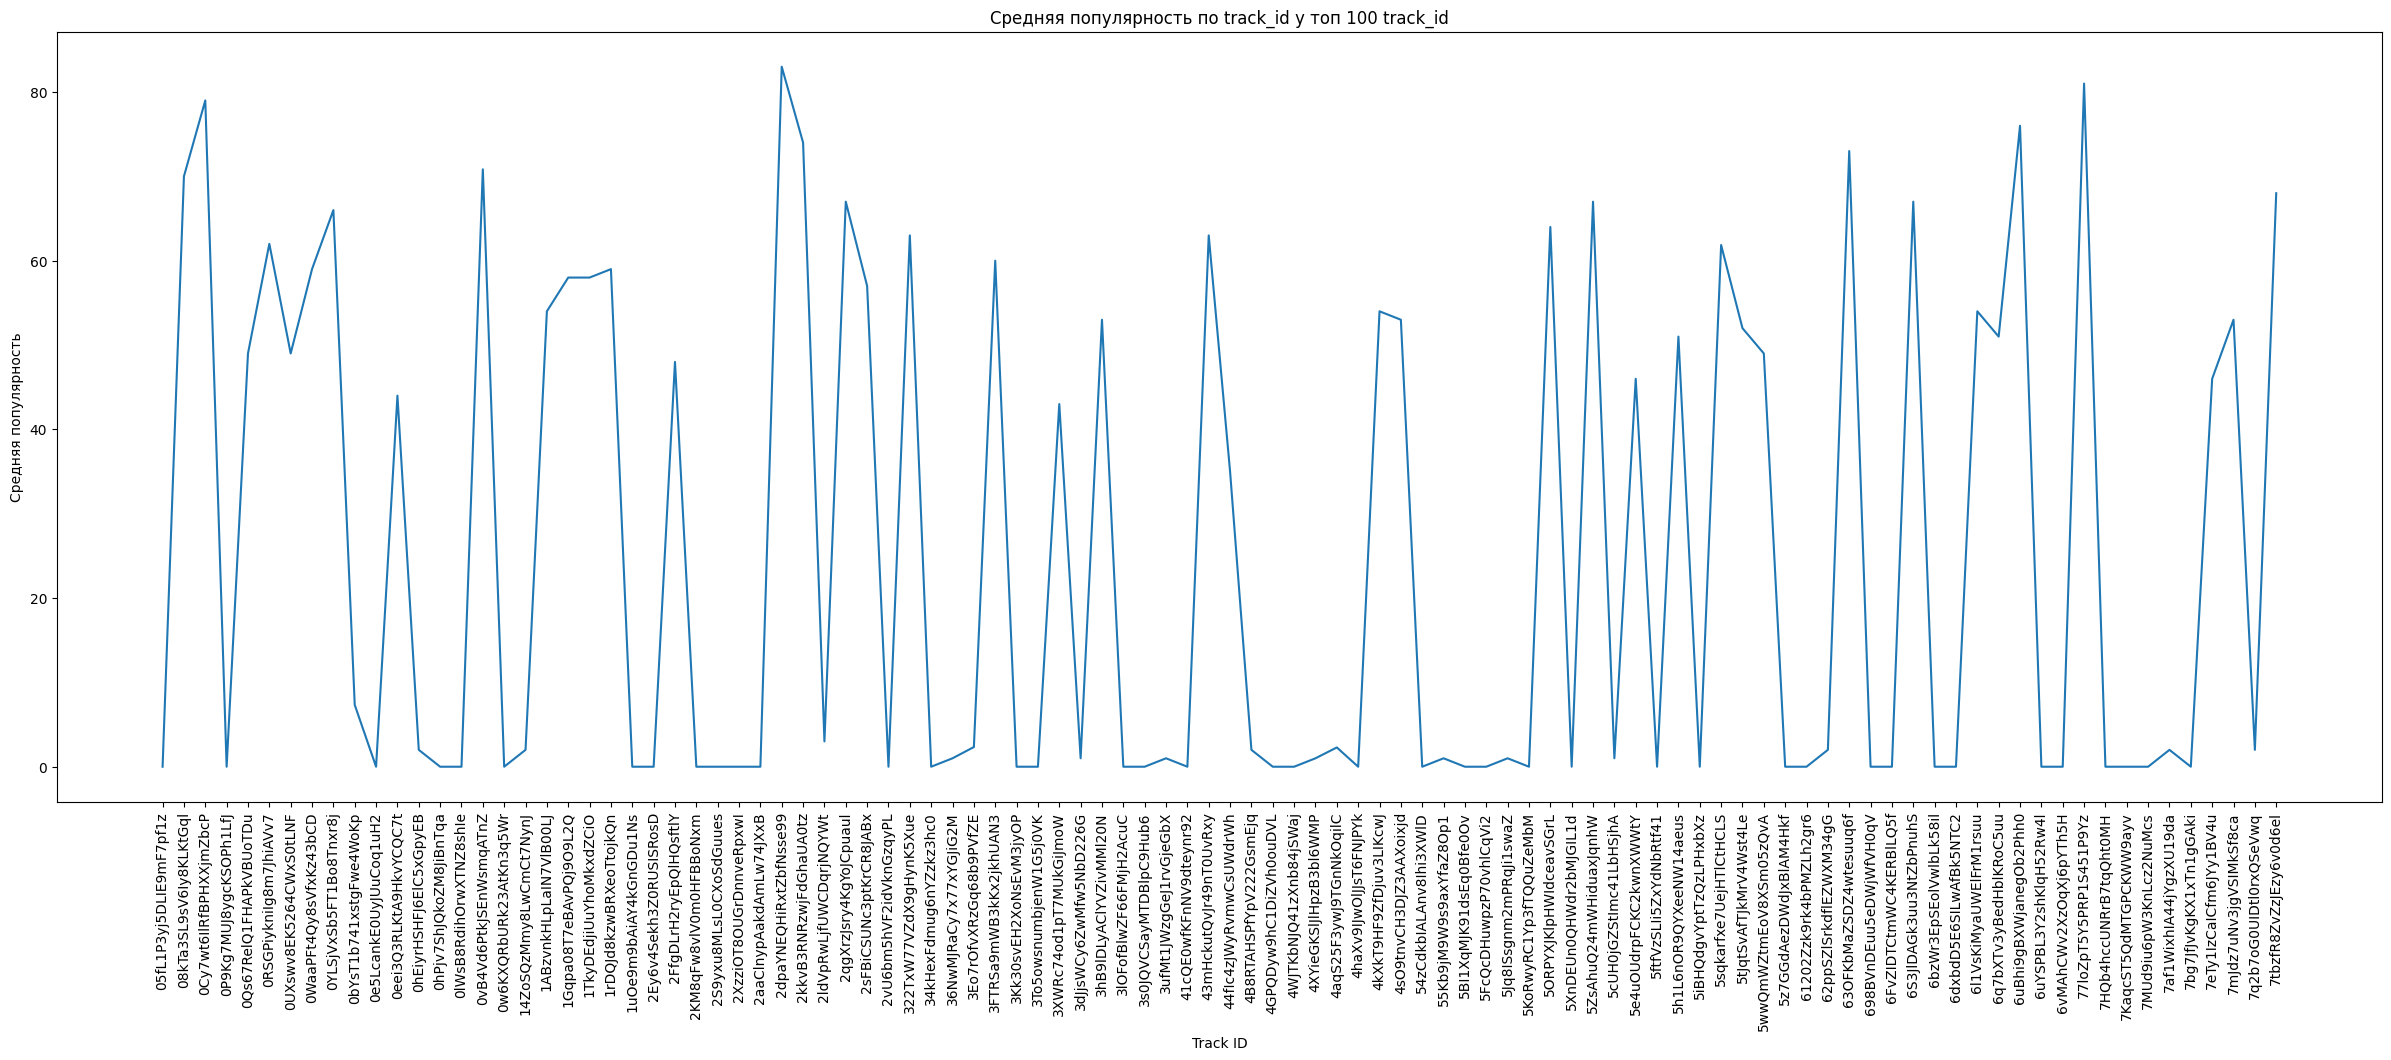

In [6]:
# 100 самых популярных треков_id(по количеству)
popular_id = df[df['track_id'].isin(df['track_id'].value_counts().index[:100])]

# Находим среднюю популярность
mean_popularity = popular_id.groupby('track_id')['popularity'].mean().reset_index()

# Построим график
plt.figure(figsize=(30, 10))
sns.lineplot(data=mean_popularity, x='track_id', y='popularity', markers=True)
plt.title('Средняя популярность по track_id у топ 100 track_id')
plt.xlabel('Track ID')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=90)
plt.show()

#### По графику можно сказать, что track_id не сильно влияет на популярность
#### Не видно явной зависимости: либо около нулевые значения, либо около 50

#### Проверим зависимость популярности от имени артиста

In [7]:
# 20 самых популярных артистов(по количеству)
top_artists = df[df['artists'].isin(df['artists'].value_counts().index[:20])]

#### Возьмем топ 20 исполнителей по количеству треков и построим график

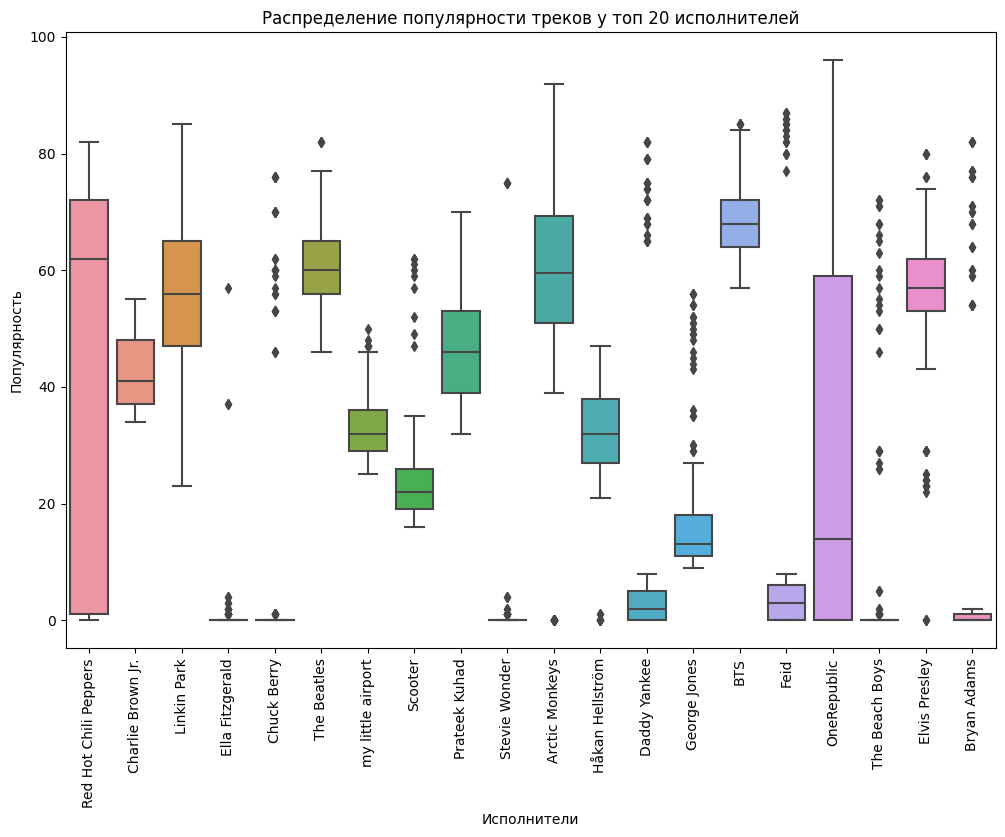

In [8]:
# Построим boxplot 
plt.figure(figsize=(12, 8))
sns.boxplot(x='artists', y='popularity', data=top_artists)
plt.title('Распределение популярности треков у топ 20 исполнителей')
plt.xlabel('Исполнители')
plt.ylabel('Популярность')
plt.xticks(rotation=90)
plt.show()

#### По этому графику не совсем понятна зависимость от исполнителя

#### Построим другой график

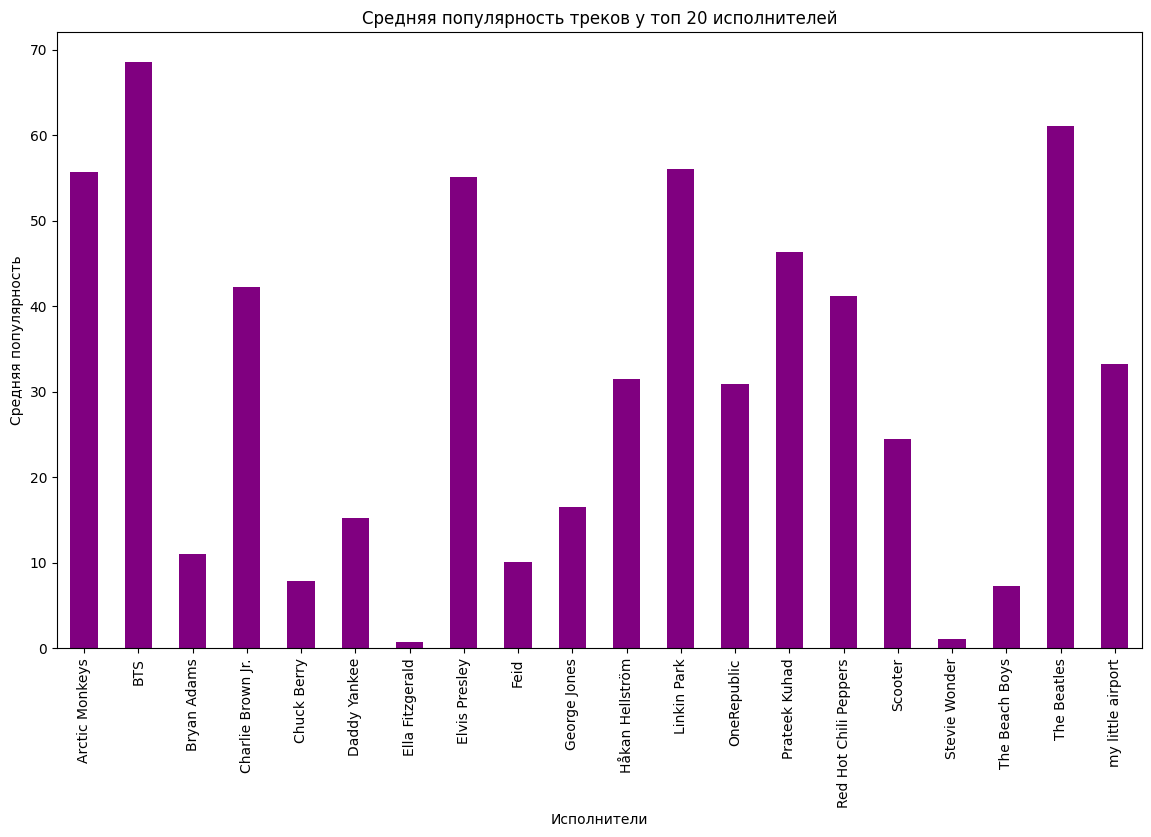

In [9]:
average_popularity = top_artists.groupby('artists')['popularity'].mean()

# Построим гистограмму
plt.figure(figsize=(14, 8))
average_popularity.plot(kind='bar', color='purple')
plt.title('Средняя популярность треков у топ 20 исполнителей')
plt.xlabel('Исполнители')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=90)
plt.show()

#### Мы проверили, что зависимость популярности от имени артиста имеется

### Гипотеза для Feature Engineering: имеется зависимость от количества артистов в треке

#### Проверим зависимость от имени альбома

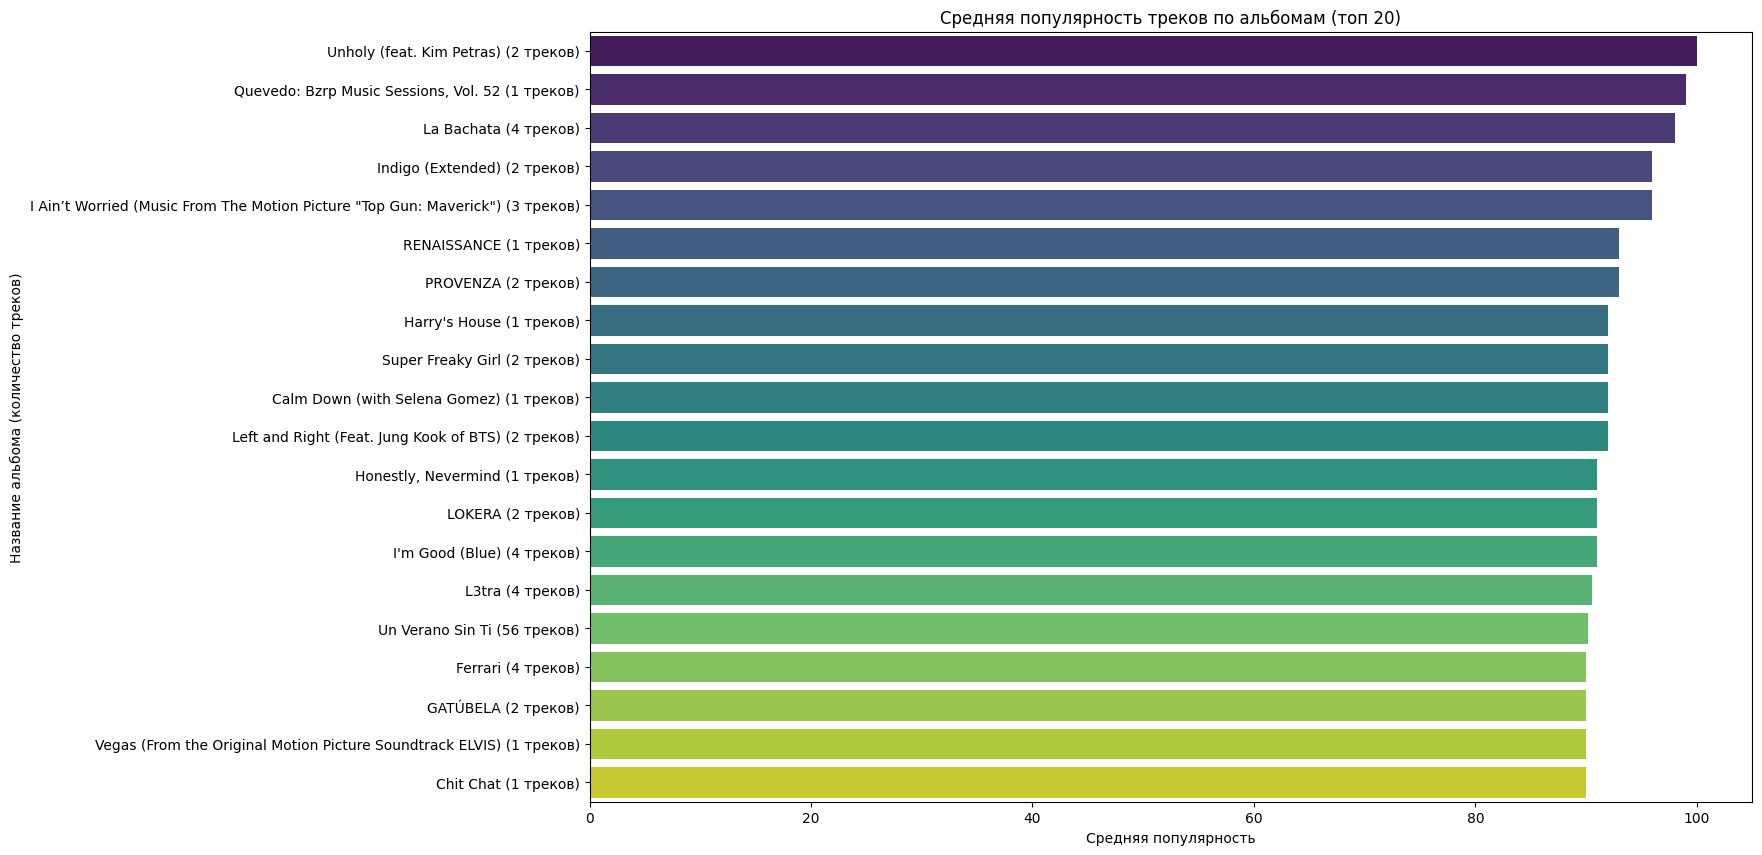

In [10]:
# 20 самых популярных альбомам(по средней популярности)
album_stats = df.groupby('album_name').agg({'popularity': 'mean', 'track_name': 'count'}).reset_index().sort_values(by='popularity', ascending=False)
album_stats = album_stats.rename(columns={'track_name': 'track_count'})
album_stats['album_label'] = album_stats['album_name'] + ' (' + album_stats['track_count'].astype(str) + ' треков)'

# Построим график
plt.figure(figsize=(15, 10))
sns.barplot(x='popularity', y='album_label', data=album_stats.head(20), palette='viridis')
plt.title('Средняя популярность треков по альбомам (топ 20)')
plt.xlabel('Средняя популярность')
plt.ylabel('Название альбома (количество треков)')
plt.show()

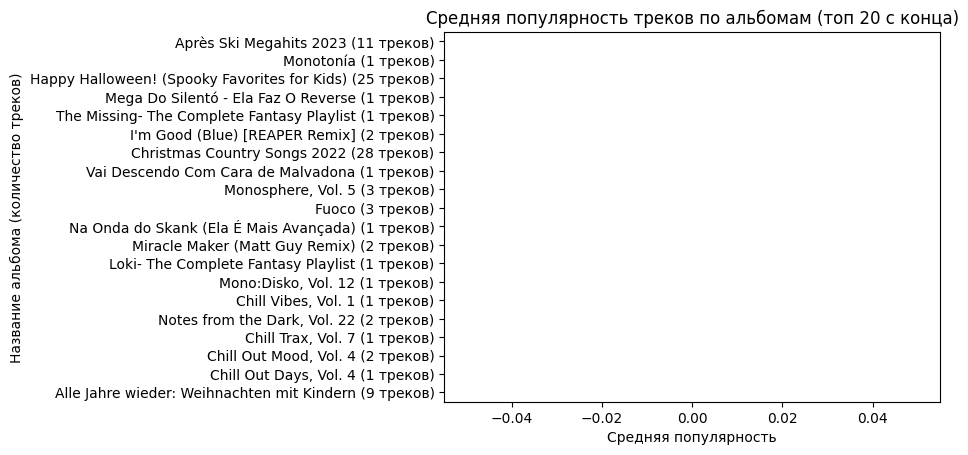

In [11]:
# Построим график 
sns.barplot(x='popularity', y='album_label', data=album_stats.tail(20), palette='viridis')
plt.title('Средняя популярность треков по альбомам (топ 20 с конца)')
plt.xlabel('Средняя популярность')
plt.ylabel('Название альбома (количество треков)')
plt.show()

#### Видим, у многих альбомов небольшое количество треков и имеются альбомы с 0 популрностью

In [12]:
df[df['popularity'] == 0]

Unnamed: 0                track_id                         artists  \
23              23  0BUuuEvNa5T4lMaewyiudB                      Jason Mraz   
24              24  3Hn3LfhrQOaKihdCibJsTs                      Jason Mraz   
26              26  5IfCZDRXZrqZSm8AwE44PG                      Jason Mraz   
27              27  0dzKBptH2P5j5a0MifBMwM                      Jason Mraz   
28              28  5QAMZTM5cmLg3fHX9ZbTZi                      Jason Mraz   
...            ...                     ...                             ...   
113046      113046  3W73vndiqDkaYwYjSMaSWu                 Rend Collective   
113047      113047  18FIFh4AGPC2zDLLFkJp4j                Kim Walker-Smith   
113048      113048  6xw4sP2mGqAtVYZkBojxcI                Kim Walker-Smith   
113049      113049  6E7Ix5jkd6uzfoxuvcI8Ww  Rend Collective;We The Kingdom   
113099      113099  4pG38RfddM4XtRAjwBOmsF           Bryan & Katie Torwalt   

                                album_name  \
23                           Coffee Moment   
24            Human - Best Adult Pop Tunes   
26                   Holly Jolly Christmas   
27      Feeling Good - Adult Pop Favorites   
28                          Christmas Time   
...                                    ...   
113046              Santa's Christmas List   
113047              Santa's Christmas List   
113048              Santa's Christmas List   
113049              Santa's Christmas List   
113099              Santa's Christmas List   

                                               track_name  popularity  \
23                                       93 Million Miles           0   
24                                               Unlonely           0   
26                                      Winter Wonderland           0   
27                                         If It Kills Me           0   
28                                      Winter Wonderland           0   
...                                                   ...         ...   
113046  Ding Dong Merrily On High (The Celebration's S...           0   
113047                     Rudolph The Red-Nosed Reindeer           0   
113048                         I'll Be Home For Christmas           0   
113049           God Rest Ye Merry Gentlemen (Hallelujah)           0   
113099        It's Beginning To Look A Lot Like Christmas           0   

        duration_ms  explicit  danceability  energy  ...  loudness  mode  \
23           216386     False         0.572   0.454  ...   -10.286     1   
24           231266     False         0.796   0.667  ...    -4.831     0   
26           131760     False         0.620   0.309  ...    -9.209     1   
27           273653     False         0.633   0.429  ...    -6.784     0   
28           131760     False         0.620   0.309  ...    -9.209     1   
...             ...       ...           ...     ...  ...       ...   ...   
113046       117226     False         0.696   0.715  ...    -7.741     1   
113047       175426     False         0.581   0.436  ...    -7.936     1   
113048       193653     False         0.413   0.437  ...    -7.983     0   
113049       217120     False         0.607   0.884  ...    -4.059     1   
113099       160199     False         0.412   0.340  ...    -6.243     1   

        speechiness  acousticness  instrumentalness  liveness  valence  \
23           0.0258        0.4770          0.000014    0.0974    0.515   
24           0.0392        0.3810          0.000000    0.2210    0.754   
26           0.0495        0.7880          0.000000    0.1460    0.664   
27           0.0381        0.0444          0.000000    0.1320    0.520   
28           0.0495        0.7880          0.000000    0.1460    0.664   
...             ...           ...               ...       ...      ...   
113046       0.0314        0.3400          0.000000    0.1800    0.959   
113047       0.0443        0.2320          0.000000    0.0547    0.412   
113048       0.0327        0.0420          0.000036    0.1460 

#### Оказалось треков с 0 популярностью достаточно много - 16020

#### Определенно имеется зависимость популярности от альбома

#### Проверим зависимость от имени трека

In [13]:
df['track_name'].nunique()

73608

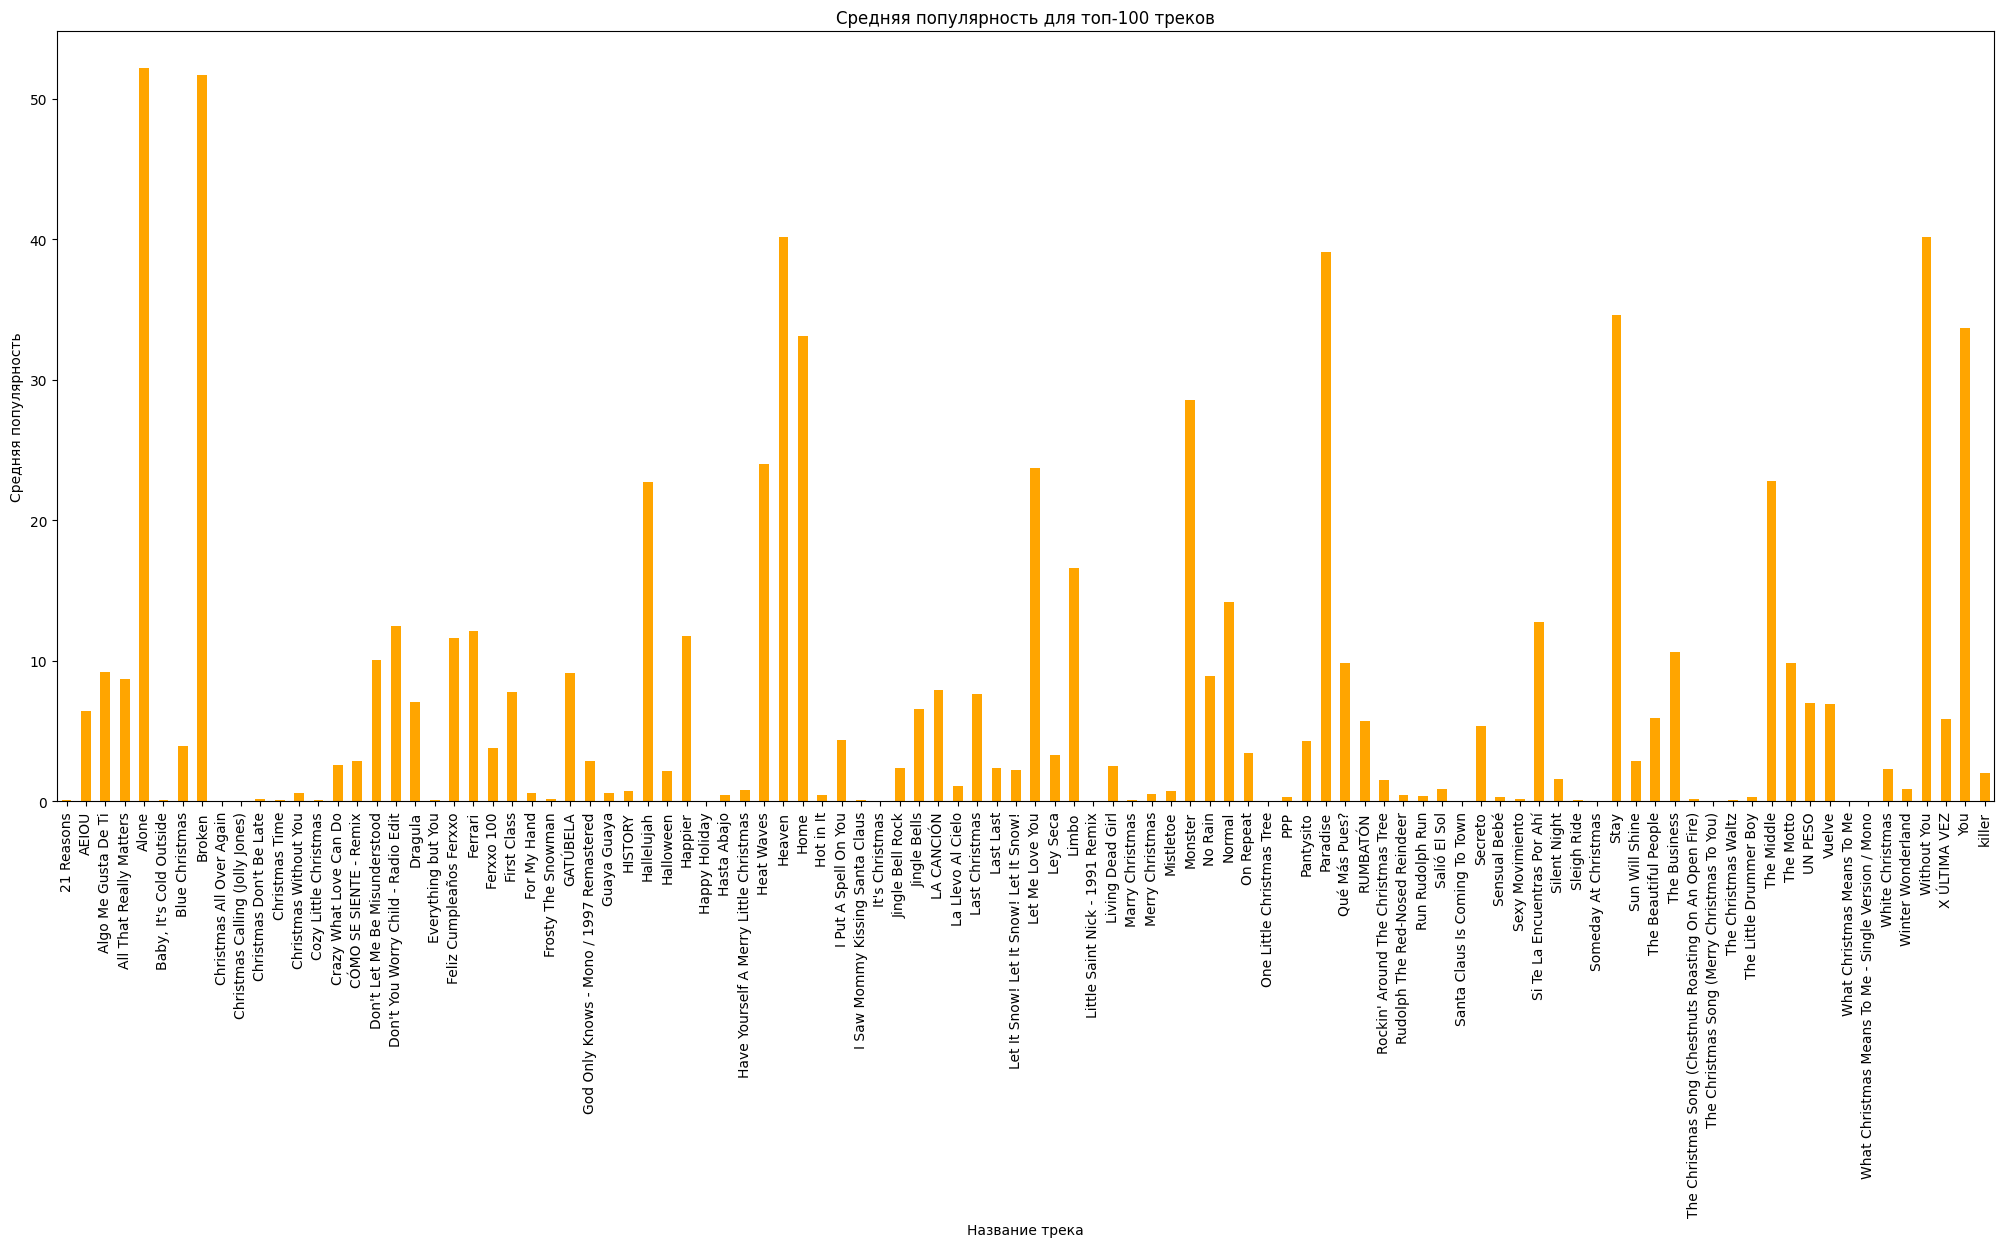

In [14]:
# Возьмем топ-100 треков(по количеству)
top_tracks = df[df['track_name'].isin(df['track_name'].value_counts().index[:100])]
average_popularity = top_tracks.groupby('track_name')['popularity'].mean()

# Построим гистограмму
plt.figure(figsize=(25, 10))
average_popularity.plot(kind='bar', color='orange')
plt.title('Средняя популярность для топ-100 треков')
plt.xlabel('Название трека')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=90)
plt.show()

#### По графику можно понять, зависимость от названия трека имеется 

#### Проверим зависимость от продолжительности трека

In [15]:
df['duration_ms'].nunique()

50697

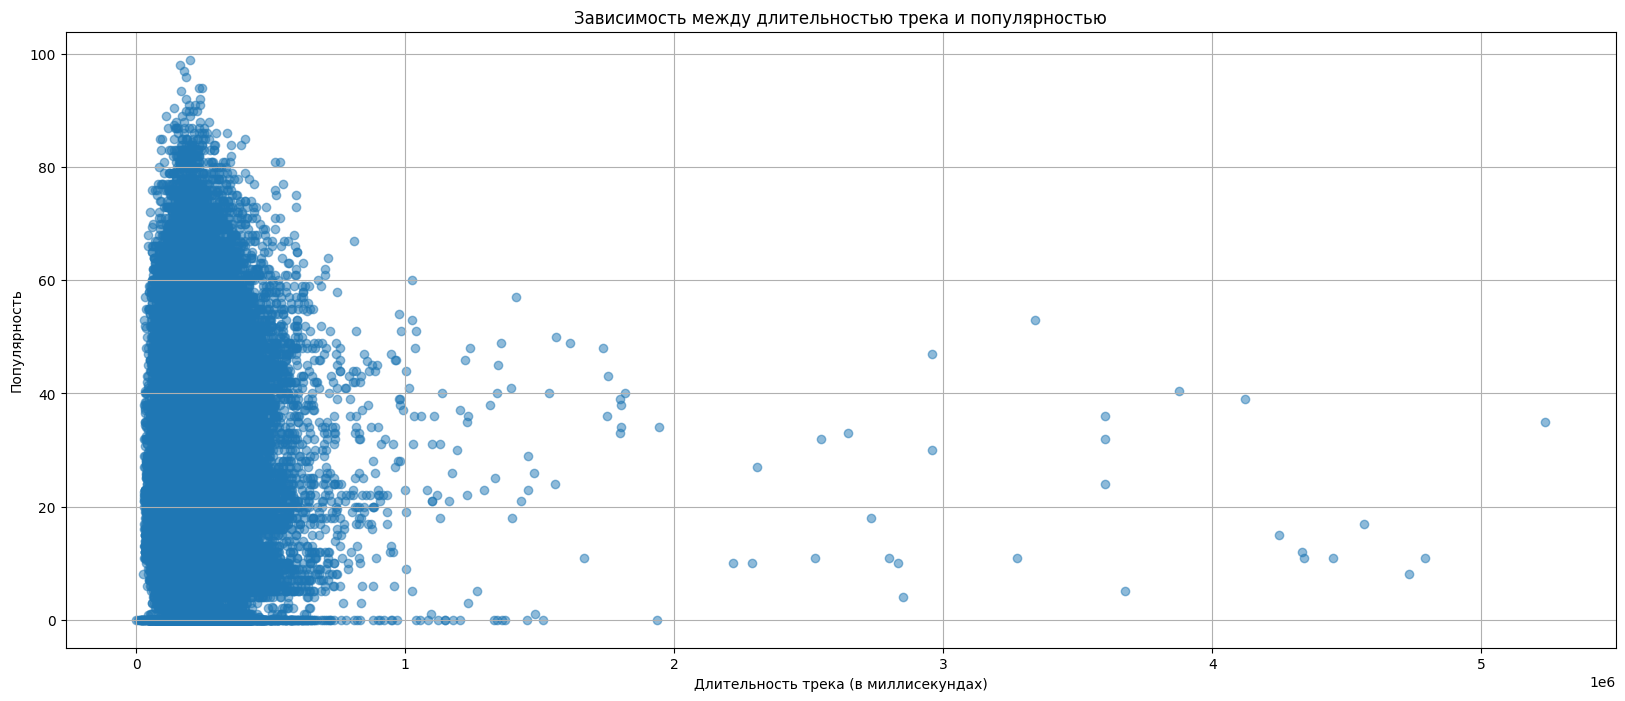

In [16]:
average_popularity = df.groupby('duration_ms')['popularity'].mean().reset_index()

# Построим график 
plt.figure(figsize=(20, 8))
plt.scatter(average_popularity['duration_ms'], average_popularity['popularity'], alpha=0.5)
plt.title('Зависимость между длительностью трека и популярностью')
plt.xlabel('Длительность трека (в миллисекундах)')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

#### Зависимость имеется, но стоит поработать с этими данными

### Гипотеза для Feature Engineering: Перевести ms в секунды или минуты, для лучшего обучения модели

#### Посмотрим Зависимость популярности от различных характеристик треков

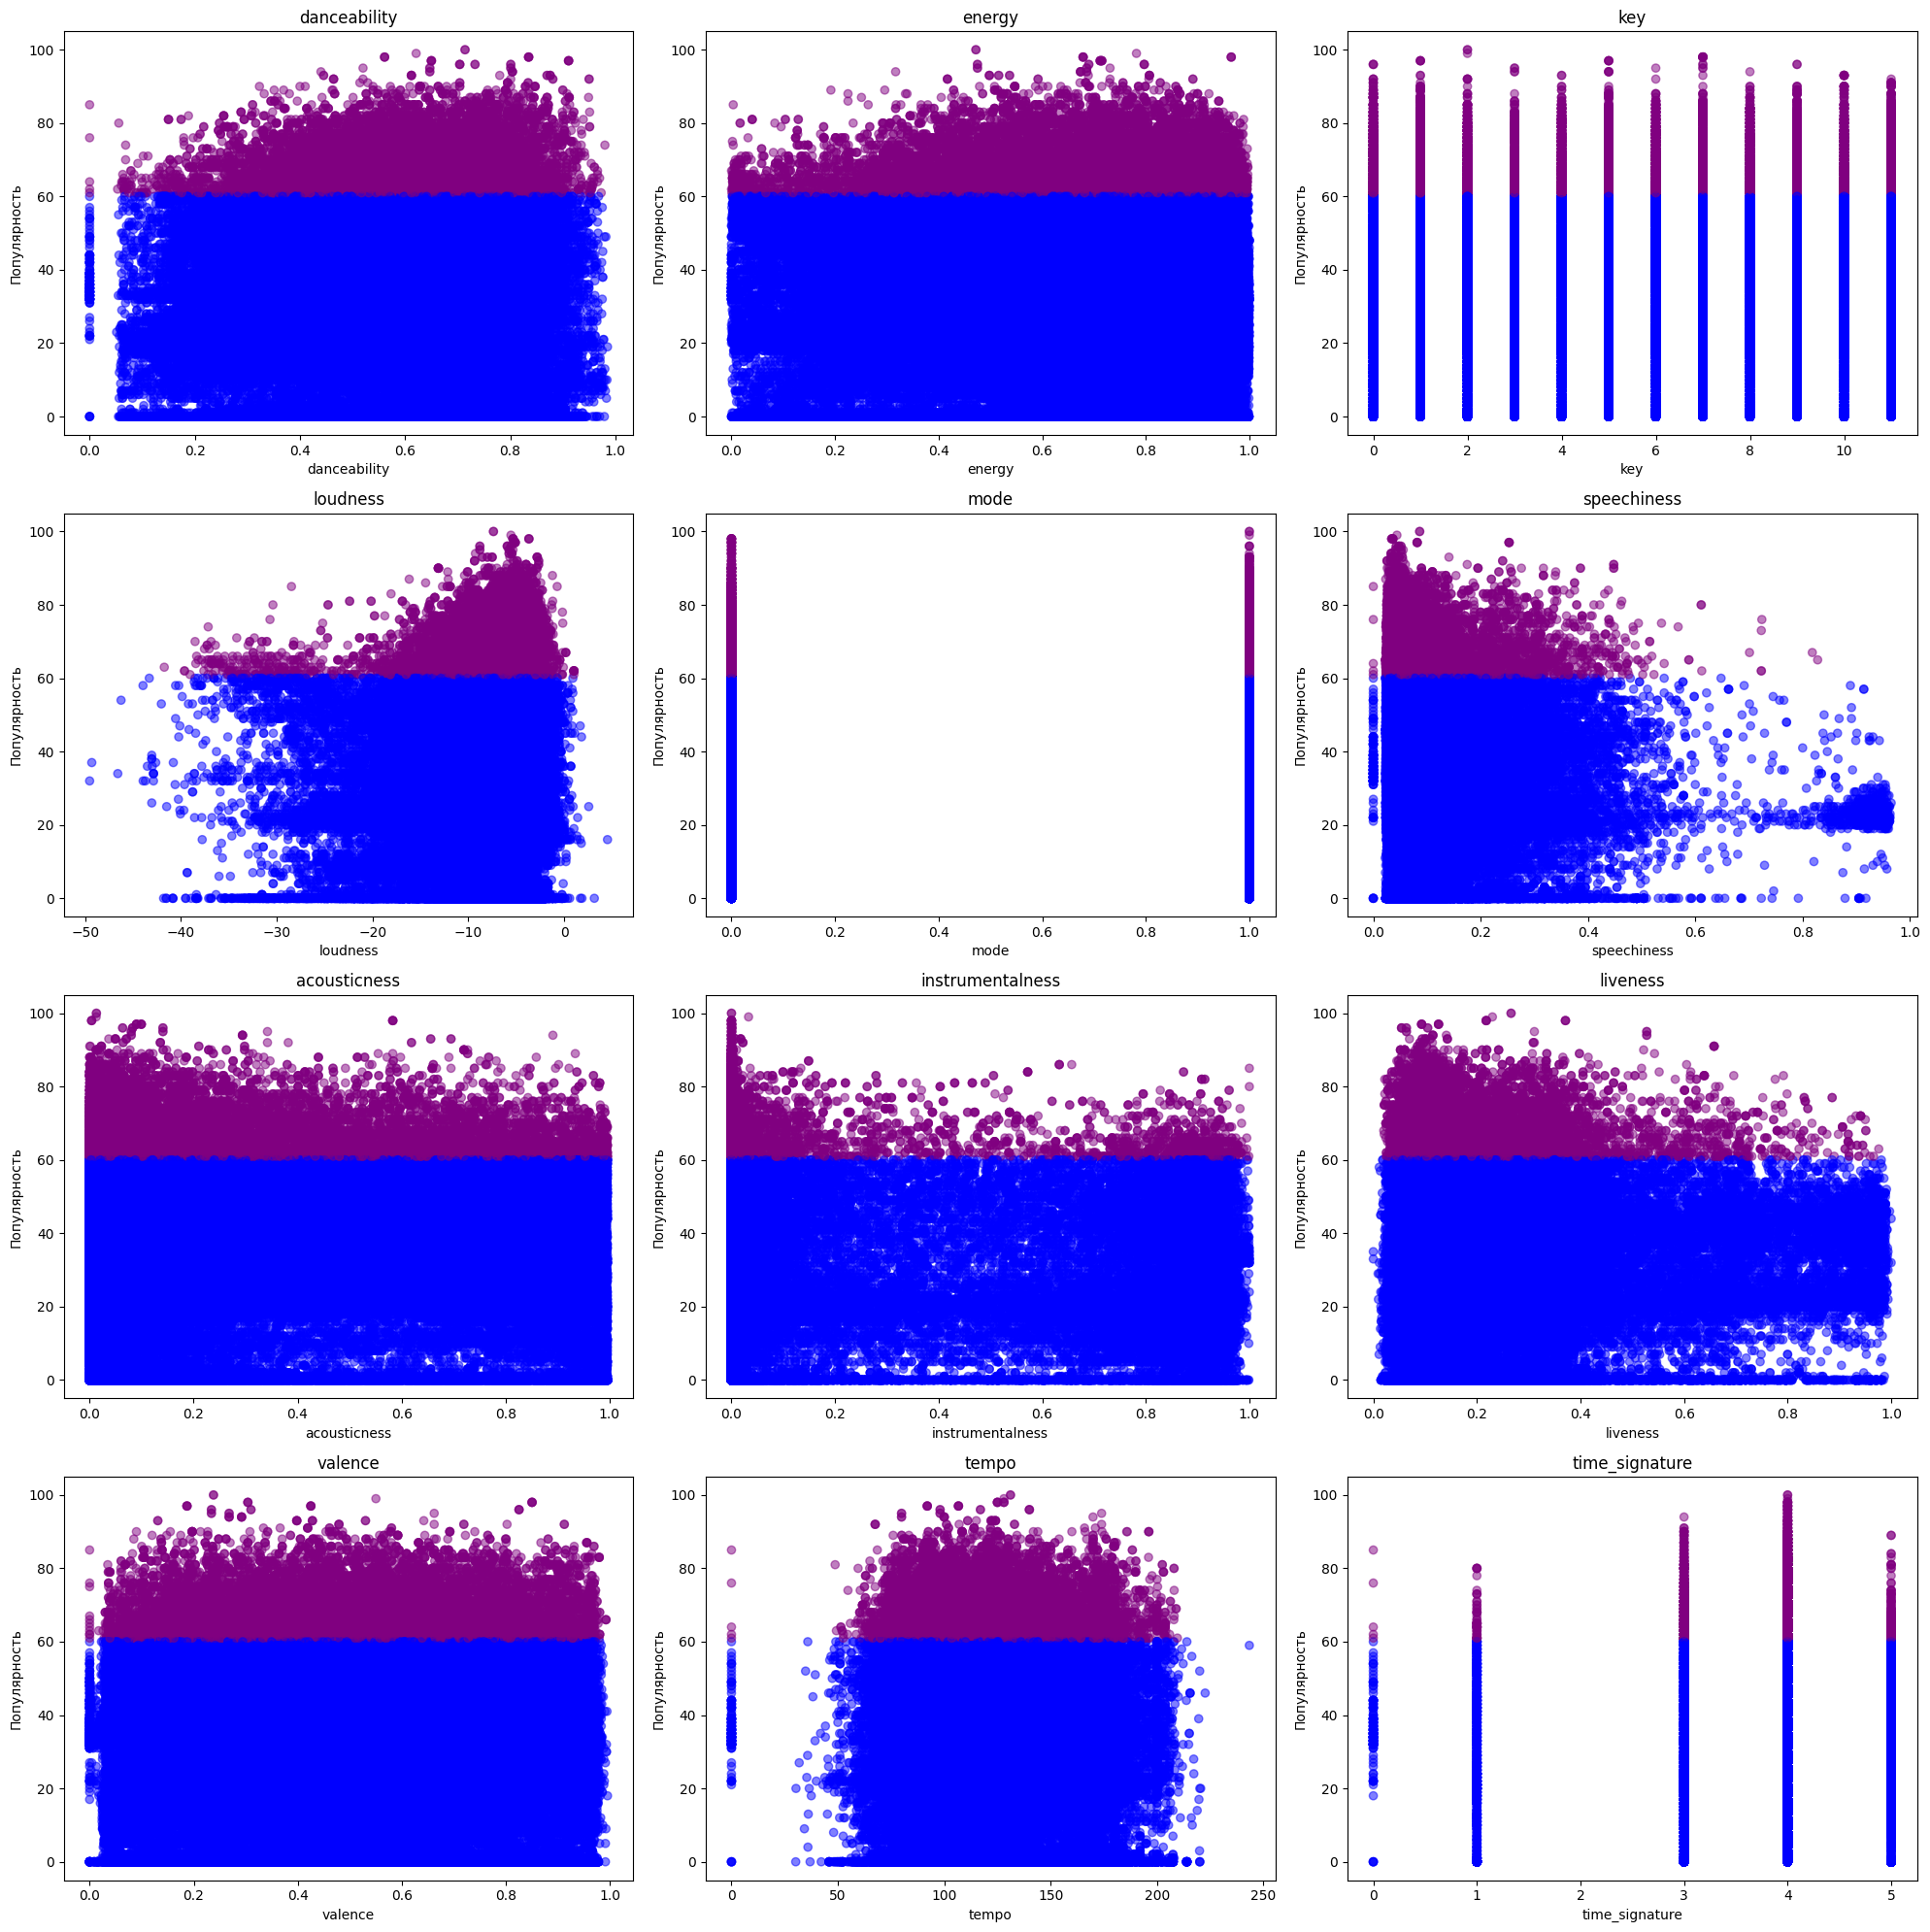

In [17]:
# Список характеристик для анализа
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


# Строим Графики
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
for i, feature in enumerate(features):
    ax = axes[i // 3, i % 3]
    colors = df['popularity'].apply(lambda x: 'purple' if x > 60 else 'blue')
    ax.scatter(df[feature], df['popularity'], c=colors, alpha=0.5)
    ax.set_title(f'{feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Популярность')
plt.tight_layout()
plt.show()

#### Предположим, что характеристики key, valence и acousticness не особо влиют на модель, так как их графики равномерны, но не будем их удалять

#### Проверим зависимость популярности от жанра

In [18]:
df['track_genre'].value_counts()

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

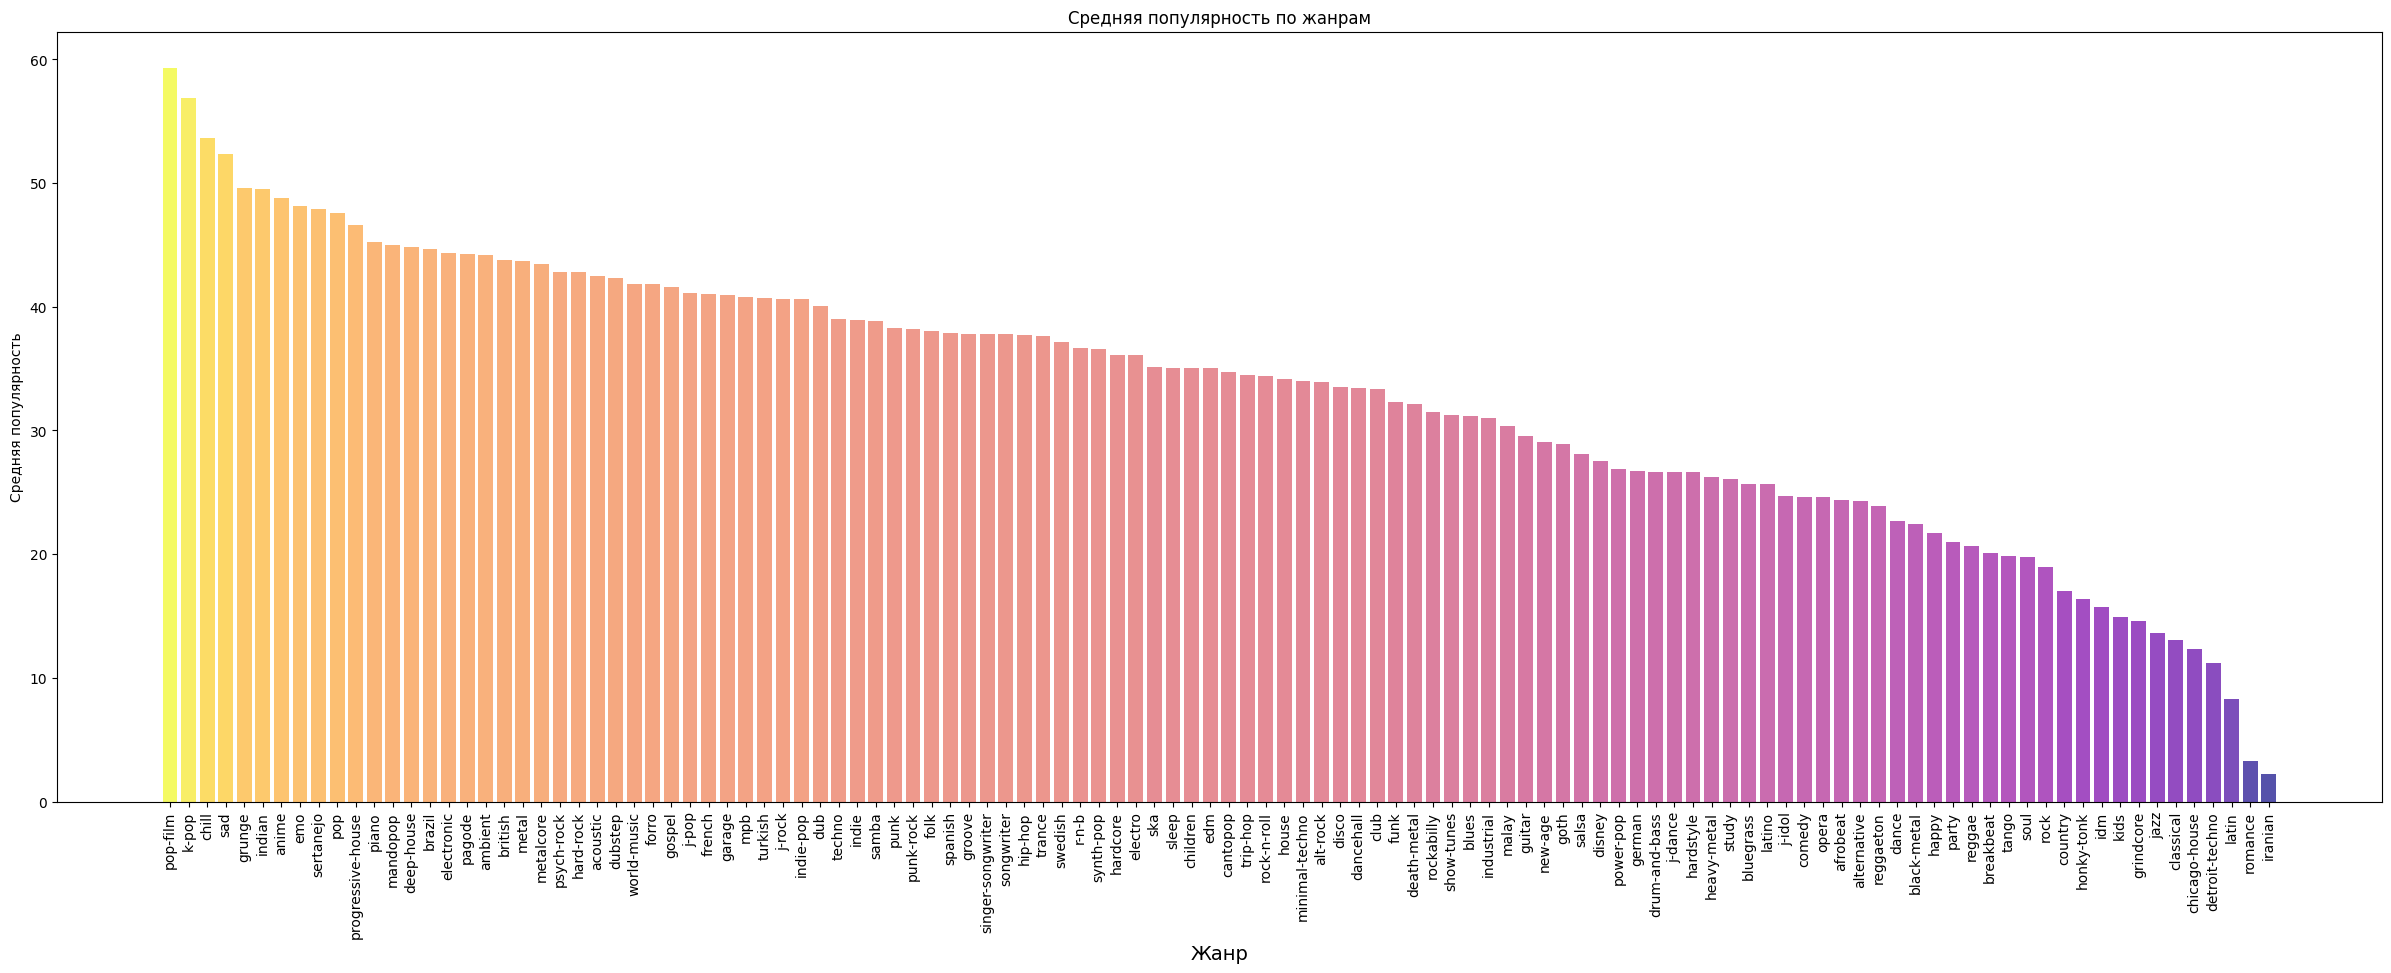

In [19]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=False)
norm_popularity = (genre_popularity['popularity'] - genre_popularity['popularity'].min()) / (genre_popularity['popularity'].max() - genre_popularity['popularity'].min()) 
colors = plt.cm.plasma(norm_popularity)

# Построим график
plt.figure(figsize=(30, 10))
plt.bar(genre_popularity['track_genre'], genre_popularity['popularity'], color=colors, alpha=0.7)
plt.xticks(rotation=90)
plt.title('Средняя популярность по жанрам')
plt.xlabel('Жанр', fontsize = 14)
plt.ylabel('Средняя популярность')
plt.show()

#### По этому графику можно с уверенностью сказать, что жанр влияет на популярность, так как у всех жанров одинаковое количество треков, но отличается средняя популярность

# Feature Engineering

#### Убираем столбец с индексом, так как у всех он разный

In [20]:
df = df.drop(columns='Unnamed: 0')

#### Убираем столбец с id трека, так как он не влияет на модель (Feature importance показал его очень маленькое влияние на модель)

In [21]:
df = df.drop(columns='track_id')

#### Проверим df на нулевые значения, чтобы не было проблем с обработкой данных

In [22]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

#### Проверим строку с пустыми значениями

In [23]:
df[df['album_name'].isnull()]

artists album_name track_name  popularity  duration_ms  explicit  \
65900     NaN        NaN        NaN           0            0     False   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
65900         0.501   0.583    7     -9.46     0       0.0605          0.69   

       instrumentalness  liveness  valence    tempo  time_signature  \
65900           0.00396    0.0747    0.734  138.391               4   

      track_genre  
65900       k-pop

#### Эту строку можно убрать, так как много значений является 0 или пустыми

In [24]:
df = df.dropna()

### Начинаем проверять гипотезы

#### Проверим зависимость от количества артистов в треке

#### Для начала посмотрим распределение количества артистов

In [25]:
df['count_art'] = df['artists'].apply(lambda x: len(x.split(';')))

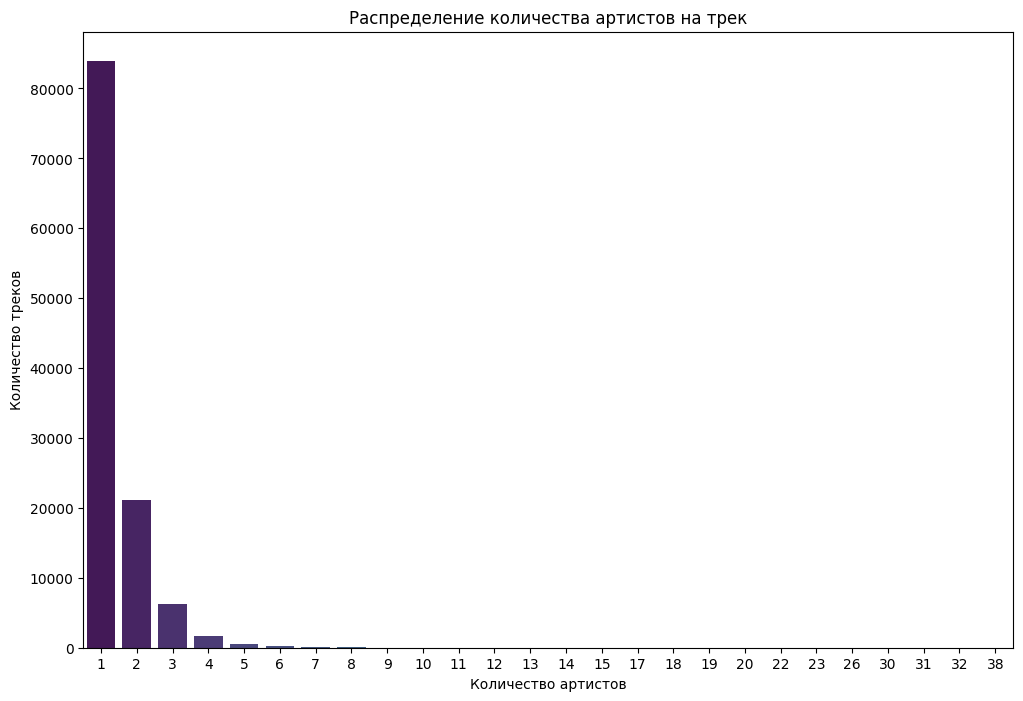

In [26]:
# Построим график
plt.figure(figsize=(12, 8))
sns.countplot(x='count_art', data=df, palette='viridis')
plt.title('Распределение количества артистов на трек')
plt.xlabel('Количество артистов')
plt.ylabel('Количество треков')
plt.show()

#### Теперь построим график зависимости популярности от количества артистов

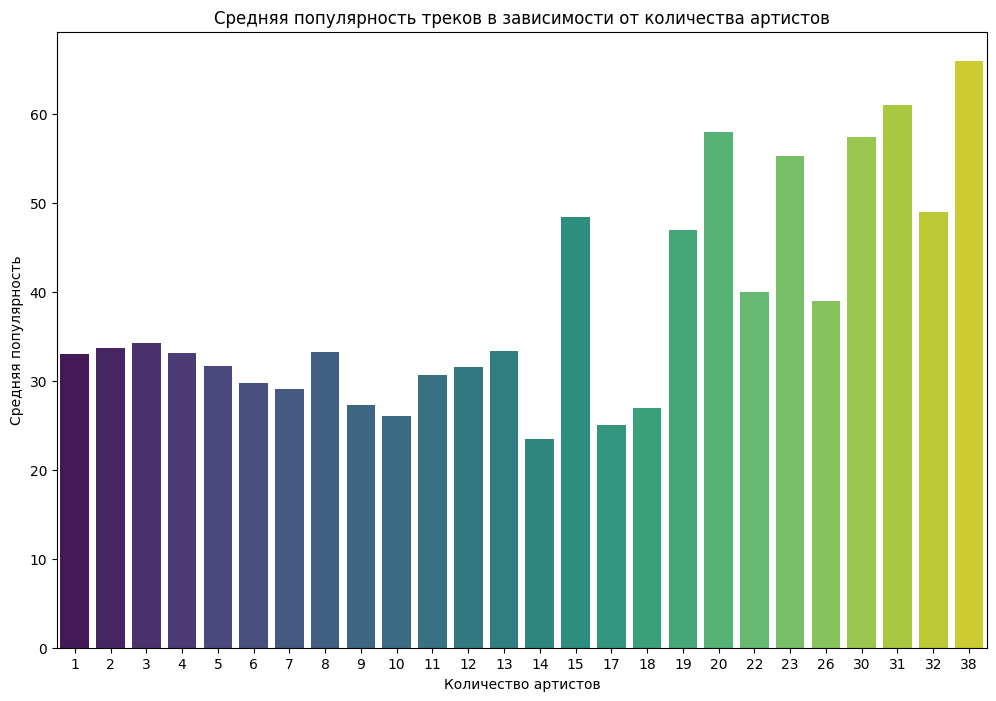

In [27]:
average_popularity_by_artists = df.groupby('count_art')['popularity'].mean().reset_index()

# Построим график
plt.figure(figsize=(12, 8))
sns.barplot(x='count_art', y='popularity', data=average_popularity_by_artists, palette='viridis')
plt.title('Средняя популярность треков в зависимости от количества артистов')
plt.xlabel('Количество артистов')
plt.ylabel('Средняя популярность')
plt.show()

#### Из графика не видна сильная зависимость количества артистов и популярности, но пока оставим это для модели

#### Проверим гипотезу с временем

In [28]:
df['duration_s'] = np.floor(df['duration_ms'] / 1000)

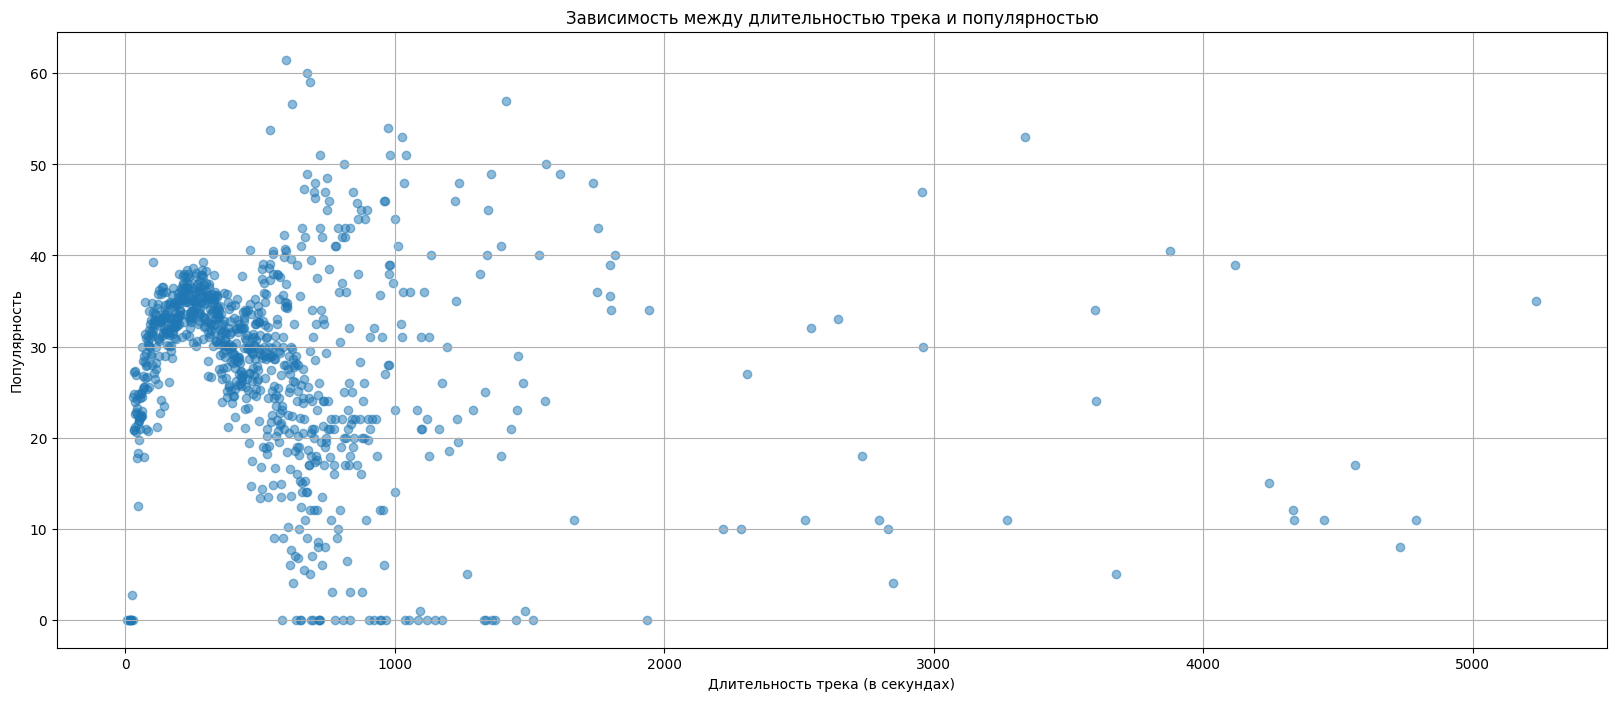

In [29]:
average_popularity = df.groupby('duration_s')['popularity'].mean().reset_index()

# Построим график 
plt.figure(figsize=(20, 8))
plt.scatter(average_popularity['duration_s'], average_popularity['popularity'], alpha=0.5)
plt.title('Зависимость между длительностью трека и популярностью')
plt.xlabel('Длительность трека (в секундах)')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()

#### Возможно с этой характерстикой модель будет работать точнее

#### Преобразуем все данные в числовые значения

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

In [31]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
label_encoders = {}

In [32]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  int64  
 1   album_name        113999 non-null  int64  
 2   track_name        113999 non-null  int64  
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  int64  
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

### Построим матрицу коррелиции

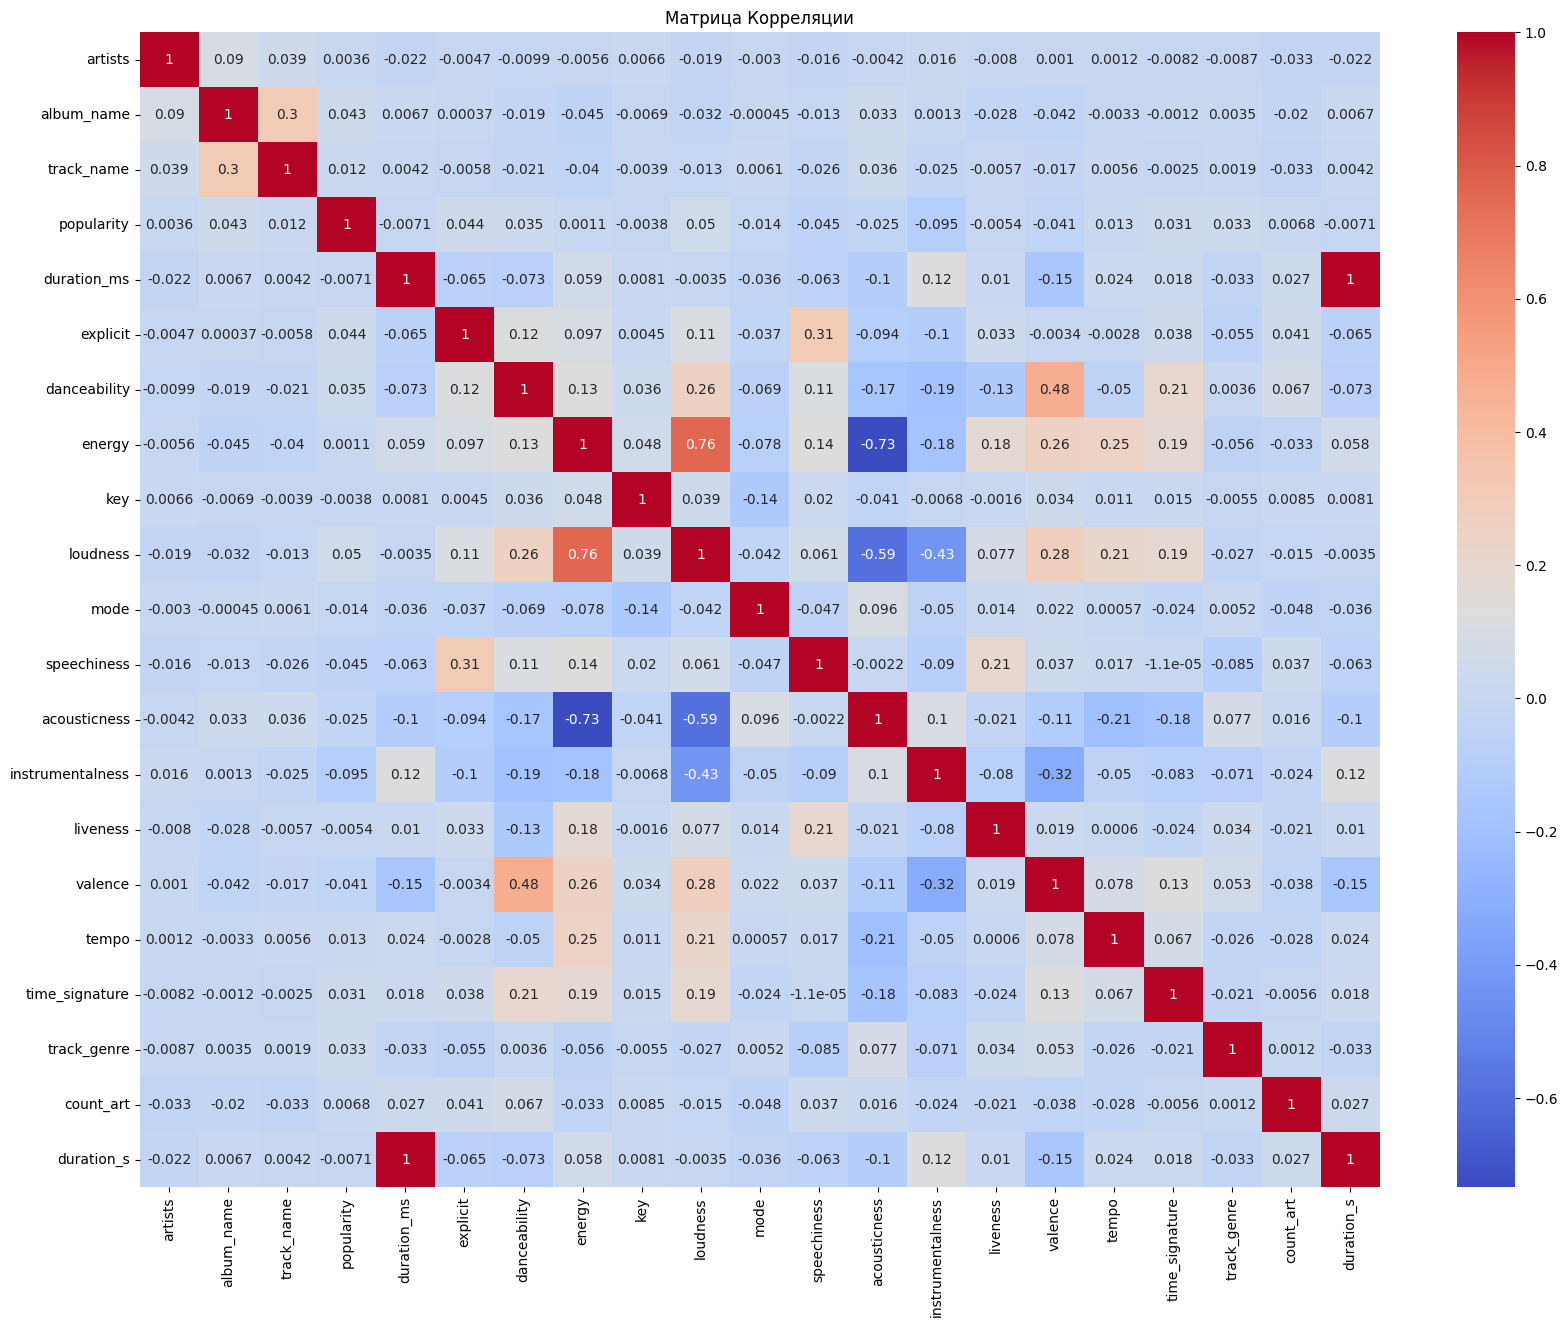

In [34]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица Корреляции')
plt.show()

### Из матрицы корреляции можно заметить сильную корреляцию acousticness с другими столбцами, также раньше отмечалось равномерность графика, поэтому мы можем убрать этот столбец
### energy и loudness сильно коррелируют, сделаем совместный признак их этих двух
### Оставим время в секундах, так как там меньше уникальных значений, модель обучиться лучше

In [35]:
df = df.drop(columns=['duration_ms', 'acousticness'])

In [36]:
df['energy_loudness_combined'] = df[['energy', 'loudness']].mean(axis=1)
df = df.drop(columns=['energy', 'loudness'])

### Построим еще одну матрицу корреляций

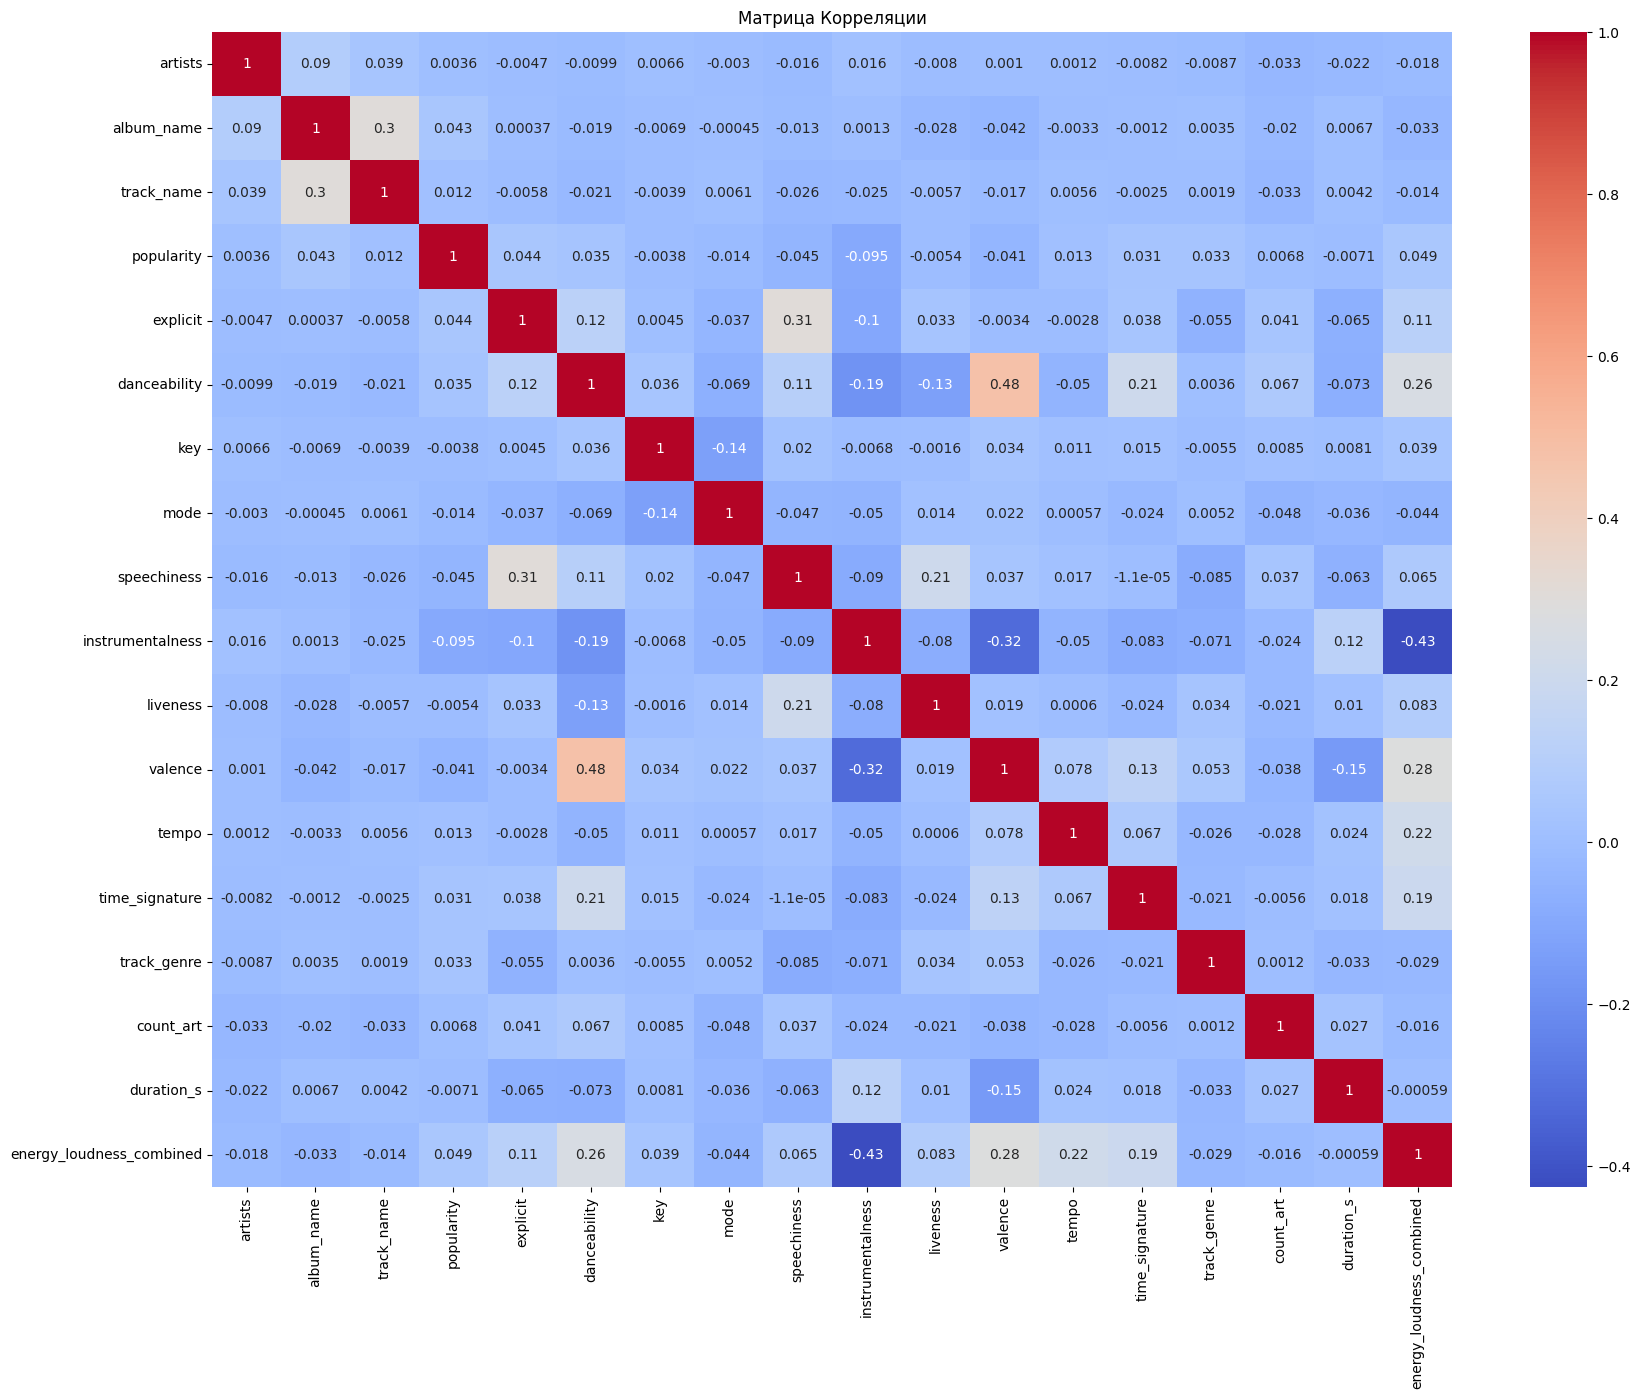

In [37]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица Корреляции')
plt.show()

# Создание моделей

In [38]:
# Разделение данных на обучающую и тестовую выборки
X = df.drop(columns=['popularity'])
y = df['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Масштабируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Нейронная сеть

#### Первоначальная модель

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 633.5320 - val_loss: 477.2932
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 470.1664 - val_loss: 467.3643
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 460.3223 - val_loss: 463.8037
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 453.2602 - val_loss: 453.2477
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 442.2103 - val_loss: 449.8850
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 441.1482 - val_loss: 446.3648
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 437.4251 - val_loss: 443.0857
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 432.1135 - val_loss: 439.5313
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 427.6609 - val_loss: 438.5627
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 424.6086 - val_loss: 433.2182
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 433.3630
Test Loss: 427.3764343261719


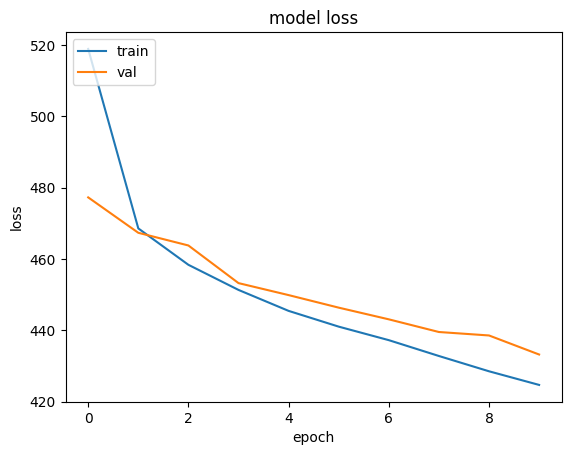

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 16.841663891542375
RMSE: 20.67308090926982
MAPE: 1.8264829601975212e+16


In [39]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

#### Получили результаты, с которыми будем сравнивать лучшие показатели модели

#### Улучшенная модель с ранним прекращением, большим количеством эпох, слоев и нейронов

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 581.8806 - val_loss: 471.7217
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 485.2247 - val_loss: 464.3976
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 474.5655 - val_loss: 455.6463
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 463.6837 - val_loss: 447.1241
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 458.9514 - val_loss: 438.0549
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 448.7006 - val_loss: 438.1564
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 447.3368 - val_loss: 422.6222
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 437.5540 - val_loss: 429.6898
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 435.3463 - val_loss: 422.1343
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 426.1254 - val_loss: 417.0495
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 428.2082 - val_lo

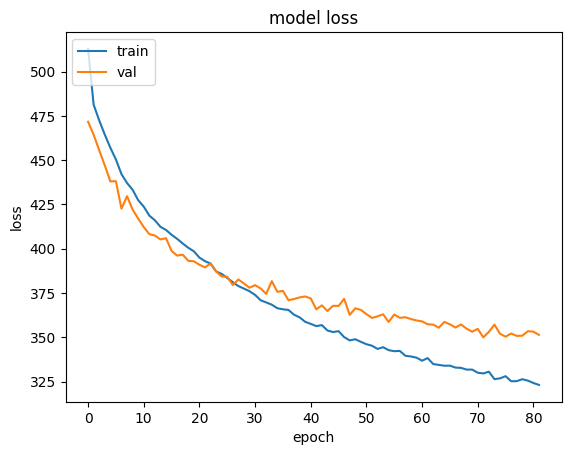

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 14.611410249952684
RMSE: 18.700882708411616
MAPE: 1.4102706098237696e+16


In [40]:
from keras.callbacks import EarlyStopping

# Увеличиваем количество слоев и нейронов
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Используем раннее прекращение
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

#### Эта модель показала себя хорошо, получили результаты значительно лучше первой модели

#### Посмотрим влияние признаков на результат

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

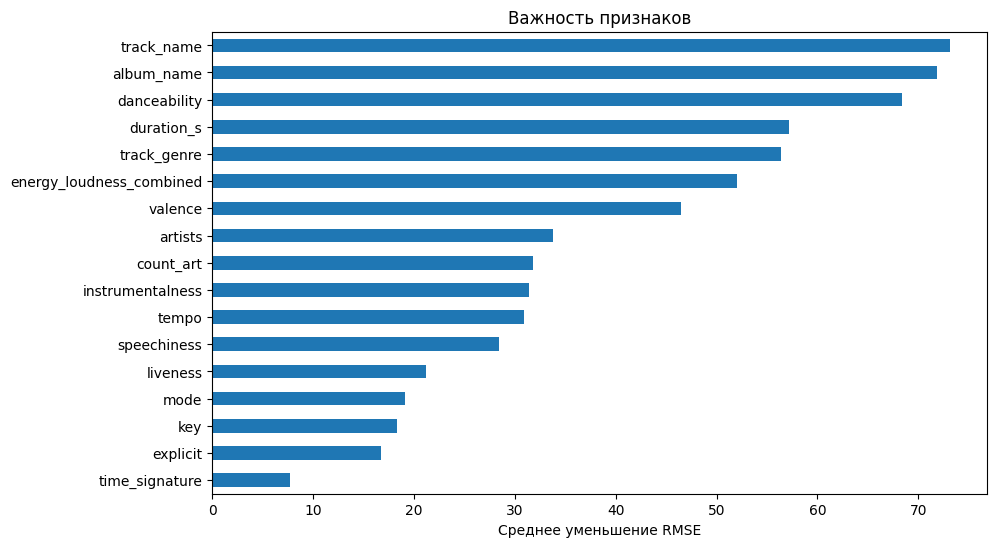

In [41]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение RMSE')
plt.show()

#### Важность признаков хорошая, ничего менять не требуется

#### В этой работе я буду сравнивать модели по RMSE

### Линейная регрессия

#### Построим модель с помощью Ridge-регрессии

In [42]:
from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

print(f'Ridge MAE: {mae_ridge}')
print(f'Ridge RMSE: {rmse_ridge}')
print(f'Ridge MAPE: {mape_ridge}')
print(f'Ridge Test Loss: {mse_ridge}')


Ridge MAE: 18.37841241663496
Ridge RMSE: 22.012653041562896
Ridge MAPE: 2.136628600082479e+16
Ridge Test Loss: 484.55689392822813


#### Модель показала себя ужасно, хуже первой модели

#### Построим модель с помощью Lasso-регрессии

In [43]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)


y_pred_lasso = lasso_model.predict(X_test)


mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
print(f'Lasso MAE: {mae_lasso}')
print(f'Lasso RMSE: {rmse_lasso}')
print(f'Lasso MAPE: {mape_lasso}')
print(f'Lasso Test Loss: {mse_lasso}')

Lasso MAE: 18.40567669627289
Lasso RMSE: 22.012561691822466
Lasso MAPE: 2.1384088446966936e+16
Lasso Test Loss: 484.55287223628994


#### Модель тоже показала себя ужасно, хуже первой модели

#### Линейная регрессия точно не подходит для нашей модели

### Деревья

#### Первоначальный вариант модели 

In [44]:
from sklearn.ensemble import RandomForestRegressor


forest_model = RandomForestRegressor(n_estimators=10, random_state=42)
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)

mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = mse_forest ** 0.5
mape_forest = mean_absolute_percentage_error(y_test, y_pred_forest)

print(f'Random Forest MAE: {mae_forest}')
print(f'Random Forest RMSE: {rmse_forest}')
print(f'Random Forest MAPE: {mape_forest}')
print(f'Random Forest Test Loss: {mse_forest}')

Random Forest MAE: 10.96266171679198
Random Forest RMSE: 14.923246721986988
Random Forest MAPE: 8057051335725004.0
Random Forest Test Loss: 222.7032927252954


#### Произошло перенасыщение модели, построим немного другую

In [45]:
# Добавил max_depth
forest_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)

mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = mse_forest ** 0.5
mape_forest = mean_absolute_percentage_error(y_test, y_pred_forest)

print(f'Random Forest MAE: {mae_forest}')
print(f'Random Forest RMSE: {rmse_forest}')
print(f'Random Forest MAPE: {mape_forest}')
print(f'Random Forest Test Loss: {mse_forest}')

Random Forest MAE: 17.385892853367846
Random Forest RMSE: 21.076564675018492
Random Forest MAPE: 1.9144938452708012e+16
Random Forest Test Loss: 444.22157850023734


#### Эта модель показала себя хуже первоначальной модели

#### Попробуем другую модель, основанная на деревьях

In [46]:
from sklearn.tree import DecisionTreeRegressor


tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree)
print(f'Decision Tree MAE: {mae_tree}')
print(f'Decision Tree RMSE: {rmse_tree}')
print(f'Decision Tree MAPE: {mape_tree}')
print(f'Decision Tree Test Loss: {mse_tree}')

Decision Tree MAE: 17.501105947198837
Decision Tree RMSE: 21.28023689871668
Decision Tree MAPE: 1.9176048765508456e+16
Decision Tree Test Loss: 452.84848246550285


#### Эта модель показала себя немного хуже предыдущей

#### Модель, основанная на деревьях, не подходит для нас, так как результаты хуже первоначальной модели

### Градиентный бустинг

#### Первоначальная версия

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)

print(f'Gradient Boosting MAE: {mae_gb}')
print(f'Gradient Boosting RMSE: {rmse_gb}')
print(f'Gradient Boosting MAPE: {mape_gb}')
print(f'Gradient Boosting Test Loss: {mse_gb}')

Gradient Boosting MAE: 17.319257481276892
Gradient Boosting RMSE: 20.77028052885348
Gradient Boosting MAPE: 1.9609975218394932e+16
Gradient Boosting Test Loss: 431.40455324727


#### Улучшенная версия с большим количеством n_estimators и max_depth

In [48]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)

print(f'Gradient Boosting MAE: {mae_gb}')
print(f'Gradient Boosting RMSE: {rmse_gb}')
print(f'Gradient Boosting MAPE: {mape_gb}')
print(f'Gradient Boosting Test Loss: {mse_gb}')

Gradient Boosting MAE: 13.1106271829406
Gradient Boosting RMSE: 16.866235808863856
Gradient Boosting MAPE: 1.3357837997257268e+16
Gradient Boosting Test Loss: 284.46991036020137


#### Модель показала себя прекрасно, с помощью этой модели мы получили лучший результат

### Кросс-валидация

#### Лучшие показатели были у модели градиентного бустинга, поэтому выполним кросс-валидацию именно для этой модели

In [49]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer


folds = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(gb_model, X, y, cv=folds, scoring=scorer)
cv_rmse_scores = (-cv_scores) ** 0.5

# Вывод результатов для каждого фолда
for i, score in enumerate(cv_rmse_scores, 1):
    print(f'Fold {i} RMSE: {score}')

print(f'Среднее значение RMSE: {cv_rmse_scores.mean()}')

Fold 1 RMSE: 16.92276559523355
Fold 2 RMSE: 16.9248120592471
Fold 3 RMSE: 17.124559125369313
Fold 4 RMSE: 16.8477578607884
Fold 5 RMSE: 16.964988681365398
Среднее значение RMSE: 16.95697666440075


#### Как видим средний RMSE около 17, что значительно лучше первончальной модели, у которой было 20,7

# Выводы

На основе проведенных экспериментов и полученных результатов можно сделать следующие выводы:

На этапе анализа, возможно, можно было бы создать больше кастомных признаков. Однако, если взглянуть на матрицу корреляций, видно, что все исходные признаки слабо связаны с популярностью. Поэтому, я считаю, моя работа выполнена достаточно хорошо.

В данной работе проведено сравнение различных моделей машинного обучения по метрике RMSE. 

Были рассмотрены несколько подходов

Нейронная сеть показала себя хорошо, но нашлось решение лучше. Показатели нейронной сети:

Первоначальная версия нейронной сети

    MAE: 16.793

    RMSE: 20.691

    MAPE: 1.853e+16

    Test Loss: 428.116

Улучшенная версия нейронной сети

    MAE: 14.351

    RMSE: 18.446

    MAPE: 1.334e+16

    Test Loss: 340.246
Анализ показал, что линейная регрессия не подходит для данной задачи, так как её результаты значительно уступают первоначальной модели. 


    Результаты Ridge-регрессии:
    
        MAE: 18.378
    
        RMSE: 22.013
    
        MAPE: 2.137e+16
    
        Test Loss: 484.557
        

    Результаты Lasso-регрессии:
    
        MAE: 18.406
    
        RMSE: 22.013
    
        MAPE: 2.138e+16
    
        Test Loss: 484.553

Модели, основанные на решающих деревьях, также не показали удовлетворительных результатов.

    Результаты случайного леса:

    	MAE: 17.386
    
    	RMSE: 21.077
    
    	MAPE: 1.9144938452708012e+16
    
    	Test Loss: 444.222


    Результаты решающего дерева:
    
    	MAE: 17.501

    	RMSE: 21.280
    
    	MAPE: 1.9176048765508456e+16
    
    	Test Loss: 452.848

Наилучшие показатели продемонстрировала модель градиентного бустинга, для которой была проведена кросс-валидация:

    Gradient Boosting
    
        MAE: 13.111
    
        RMSE: 16.866
    
        MAPE: 1.336e+16
    
        Test Loss: 284.470




    Fold 1 RMSE: 16.923

    Fold 2 RMSE: 16.925

    Fold 3 RMSE: 17.125

    Fold 4 RMSE: 16.848

    Fold 5 RMSE: 16.965

    Среднее значение RMSE: 16.957


Мы смогли намного улучшить результаты, показатели RMSE уменьшились на 18%, а Test loss на 34%.
